In [2]:
import numpy as np
import scipy.optimize

# Notes

Power nodes are labeled $P_i$.

Split ratio are labeled as $s_i$. Tranmission fraction through a PBSP is set by $s_i$, while reflection through a PBSC is $1-s_i$

Power nubers from a PBSC are orderd transmission/reflection. Ex, in the first PBSC, $P_1$ is transmitted while $P_2$ is reflected.


Note: P6/P7 are actually after the fiber coupling and you can account for fiber efficiency in the following code


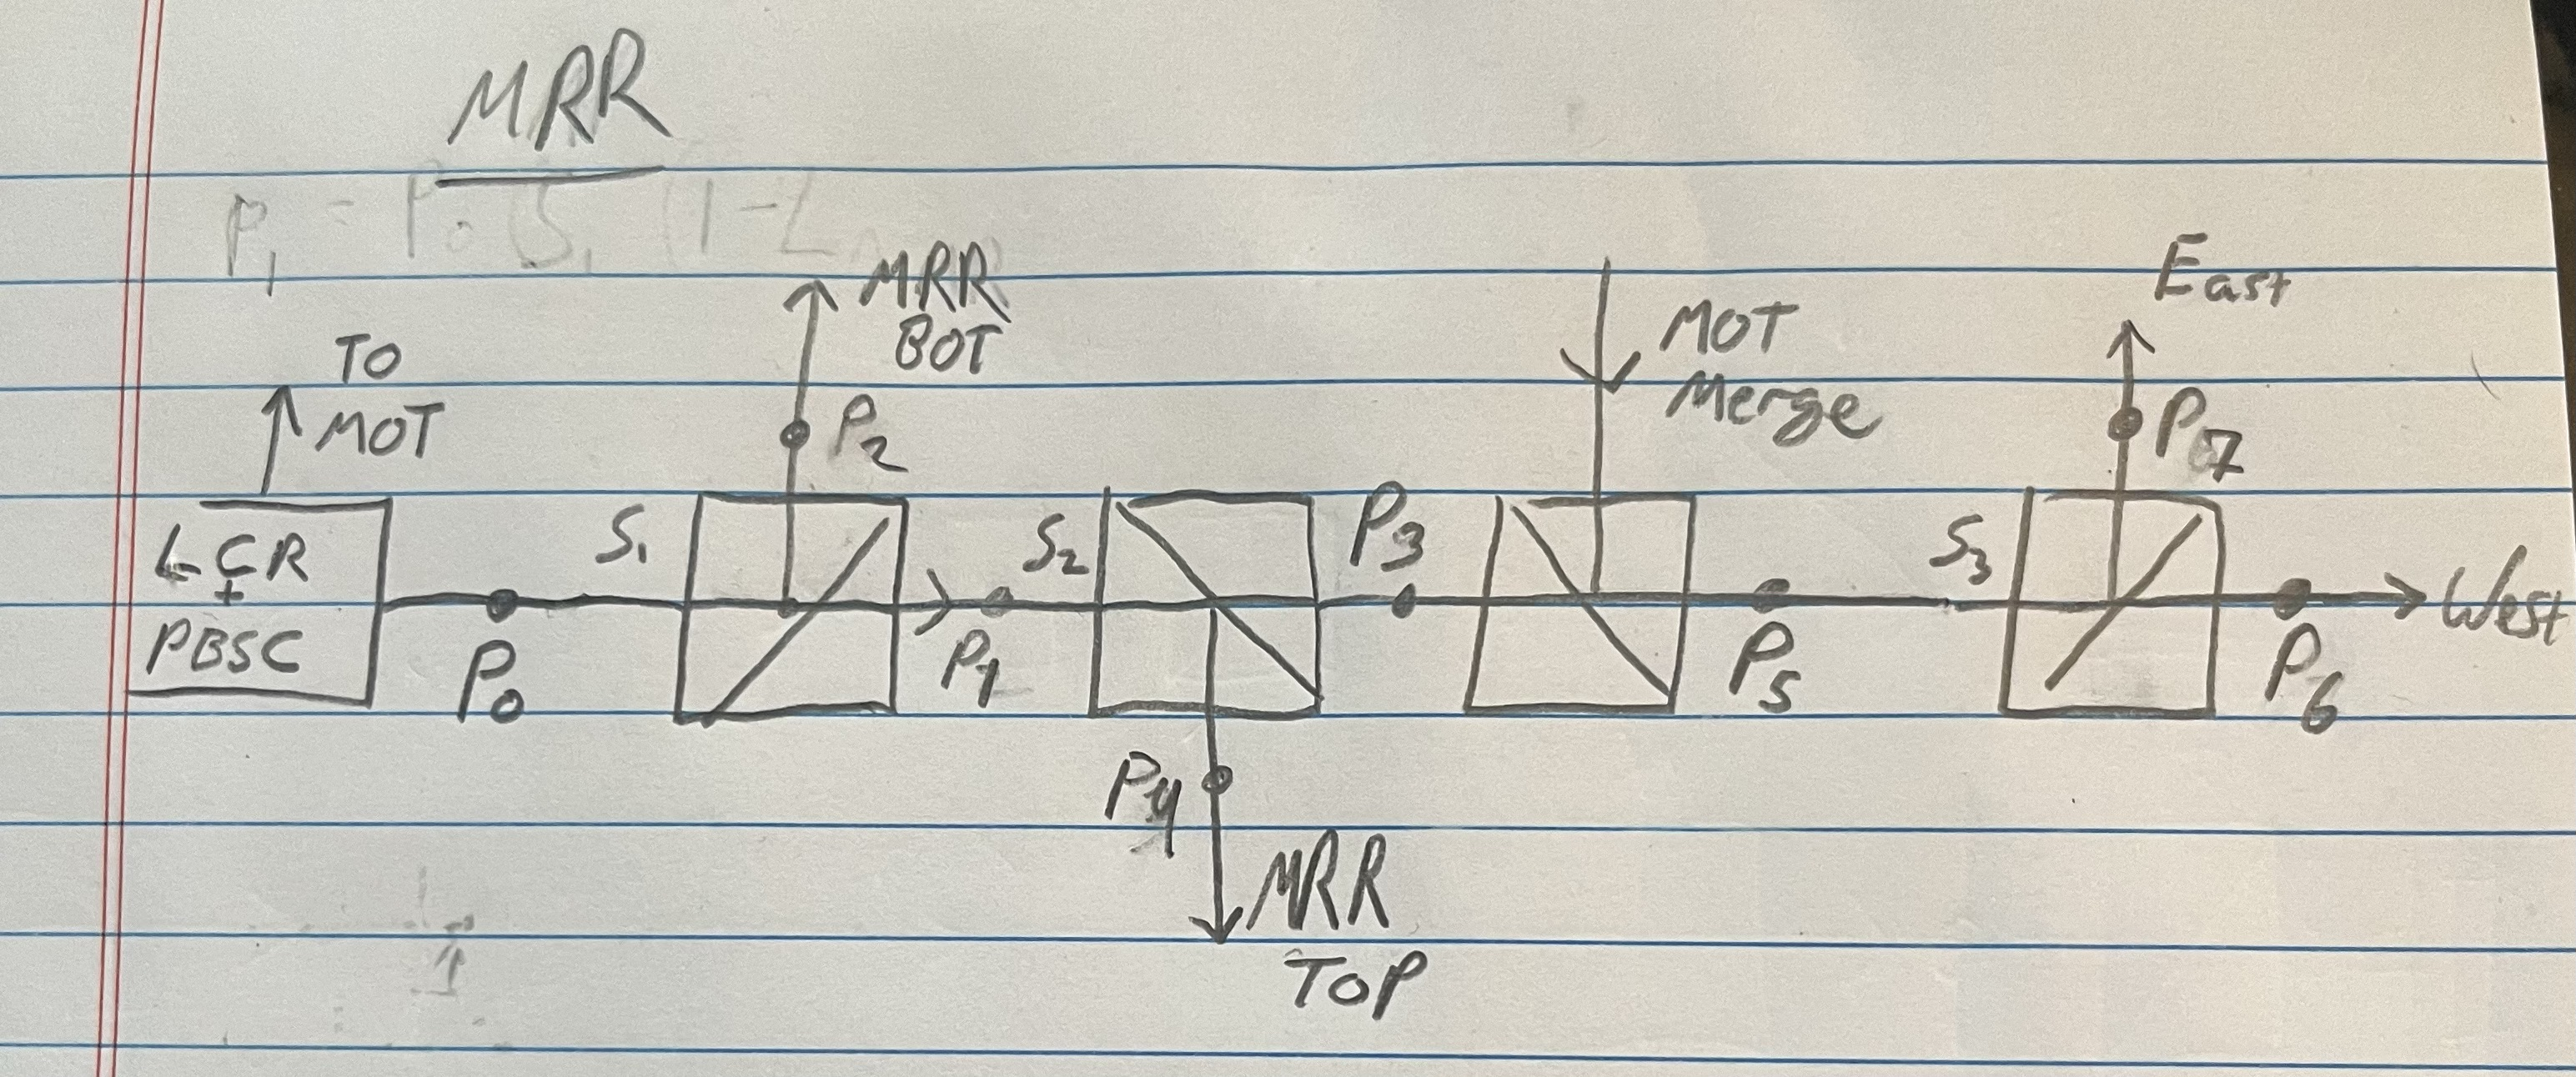

In [3]:
%matplotlib inline
from IPython.display import Image

print("Note: P6/P7 are actually after the fiber coupling and you can account for fiber efficiency in the following code")
Image('./IMG_8340.jpeg', width= 800)


In [15]:
#MRR beam
# --- Fractional transmission ---
T_MRR_BOT_NET       = .966 #  Measured. Sum of both output beams/input beam.
T_MRR_BOT_TRANS     = 1 #Transmisstion fraction transmited through MMR BOT MRR PBSC
T_MRR_BOT_REF       = 1 #Transmisstion fraction reflected through MMR BOT MRR PBSC

T_MRR_TOP_NET       = .976 #  Measured. Sum of both output beams/input beam.
T_MRR_TOP_TRANS     = 1 # etc...
T_MRR_TOP_REF       = 1

T_MOT_MERGE         = .961 #  Measured. Output/input beam.

T_EW_NET            = .93
T_EW_TRANS          = 1
T_EW_REF            = 1
# Fractional coupling efficiency (set to 1 to not take them into account)
C_FIBER_EAST        = .48
C_FIBER_WEST        = .65

P0   = 1.0  # normalized input power
P0_W = 10.74 #input power mW

def powers(s):
    """Compute powers at all relevant nodes given s_i"""
    s1, s2, s3 = s #unpack s vector
    # Split 1: fraction s_i is transmitted straight; 1-s_i is reflected
    P1 = P0 * s1 * T_MRR_BOT_TRANS * T_MRR_BOT_NET            # Transmitted MRR BOT PBSC 
    P2 = P0 * (1 - s1) * T_MRR_BOT_REF * T_MRR_BOT_NET          # Reflected MRR BOT PBSC
    P3 = P1 * s2 * T_MRR_TOP_TRANS * T_MRR_TOP_NET              # Transmitted MRR TOP PBSC 
    P4 = P1 * (1-s2) * T_MRR_TOP_REF * T_MRR_TOP_NET           # Reflected MRR TOP PBSC 
    P5 = P3 * T_MOT_MERGE                       # Transmitted MOT merge PBSC
    P6 = P5 * s3 * T_EW_TRANS * T_EW_NET * C_FIBER_WEST    # Transmitted EastWest PBSC 
    P7 = P5 * (1-s3) * T_EW_REF * T_EW_NET * C_FIBER_EAST  # Reflected EastWest PBSC 
    return P1, P2, P3, P4, P5, P6, P7

def cost(s):
    """Deviation from constraints P2 = P4 = 6*P6 = 6*P7."""
    P1, P2, P3, P4, P5, P6, P7 = powers(s) #compute powers based on s_i
    c1 = np.abs(P2 - P4)
    c2 = np.abs(P2 - 6*P6)
    c3 = np.abs(P6 - P7)
    return c1 + c2 + c3

# Initial guess for split fractions
initial_guess = [.5, .5, .5]
bounds=[(0, 1), (0, 1), (0, 1)]
# Minimize the cost function
result = scipy.optimize.minimize(cost, initial_guess, bounds=bounds)
best_parameters = result.x
best_cost = result.fun



s1_best, s2_best, s3_best = best_parameters
P1, P2, P3, P4, P5, P6, P7 = powers(best_parameters)

# --- Display ---
#print(f"Solved split fractions: \n    s1={s1_best:.3f}, s2={s2_best:.3f}, s3 = {s3_best:.3f}")
#print(f"Fractional Powers: \n    P1={P1:.3f}, P2={P2:.3f}, P3={P3:.3f}, P4={P4:.3f}, P5={P5:.3f}, P6={P6:.3f}, P7={P7:.3f} ")
print(f"Powers [mW] for P_0 = {P0_W} mW: \n    P1={P0_W*P1:.3f}mW, P2={P0_W*P2:.3f}mW, P3={P0_W*P3:.3f}mW, P4={P0_W*P4:.3f}mW, P5={P0_W*P5:.3f}mW, P6={P0_W*P6:.3f}mW, P7={P0_W*P7:.3f}mW ")
#print(f"Ratios:\n    P1/P2={P1/P2:.2f}, P3/P4={P3/P4:.2f}, P6/P7={P6/P7:.2f}")
#print(f"Total fractional output:\n   P2 + P4 + P6 + P7 = {P2 + P4 + P6 + P7:.3f}")



Powers [mW] for P_0 = 10.74 mW: 
    P1=6.556mW, P2=3.819mW, P3=2.580mW, P4=3.819mW, P5=2.479mW, P6=0.636mW, P7=0.637mW 


In [ ]:
#MOT Beam

# --- Fractional transmission ---
T_MOT_SOUTH_TRANS     = .95 #Transmisstion fraction transmited through MMR BOT MRR PBSC
T_MRR_BOT_REF       = .95 #Transmisstion fraction reflected through MMR BOT MRR PBSC
T_MRR_TOP_TRANS     = .95 # etc...
T_MRR_TOP_REF       = .95
T_MOT_MERGE         = .95
T_EW_TRANS          = .95
T_EW_REF            = .95
# Fractional coupling efficiency (set to 1 to not take them into account)
C_FIBER_EAST        = 1
C_FIBER_WEST        = 1

P0   = 1.0  # normalized input power
P0_W = 12.3 #input power mW

def powers(s):
    """Compute powers at all relevant nodes given s_i"""
    s1, s2, s3 = s #unpack s vector
    # Split 1: fraction s_i is transmitted straight; 1-s_i is reflected
    P1 = P0 * s1 * T_MRR_BOT_TRANS              # Transmitted MRR BOT PBSC 
    P2 = P0 * (1 - s1) * T_MRR_BOT_REF          # Reflected MRR BOT PBSC
    P3 = P1 * s2 * T_MRR_TOP_TRANS              # Transmitted MRR TOP PBSC 
    P4 = P1 * (1-s2) * T_MRR_TOP_REF            # Reflected MRR TOP PBSC 
    P5 = P3 * T_MOT_MERGE                       # Transmitted MOT merge PBSC
    P6 = P5 * s3 * T_EW_TRANS * C_FIBER_WEST    # Transmitted EastWest PBSC 
    P7 = P5 * (1-s3) * T_EW_REF * C_FIBER_EAST  # Reflected EastWest PBSC 
    return P1, P2, P3, P4, P5, P6, P7

def cost(s):
    """Deviation from constraints P2 = P4 = 6*P6 = 6*P7."""
    P1, P2, P3, P4, P5, P6, P7 = powers(s) #compute powers based on s_i
    c1 = np.abs(P2 - P4)
    c2 = np.abs(P2 - 6*P6)
    c3 = np.abs(P6 - P7)
    return c1 + c2 + c3

# Initial guess for split fractions
initial_guess = [.5, .5, .5]
bounds=[(0, 1), (0, 1), (0, 1)]
# Minimize the cost function
result = scipy.optimize.minimize(cost, initial_guess, bounds=bounds)
best_parameters = result.x
best_cost = result.fun



s1_best, s2_best, s3_best = best_parameters
P1, P2, P3, P4, P5, P6, P7 = powers(best_parameters)

# --- Display ---
print(f"Best split fractions: \n    s1={s1_best:.3f}, s2={s2_best:.3f}, s3 = {s3_best:.3f}")
print(f"Fractional Powers: \n    P1={P1:.3f}, P2={P2:.3f}, P3={P3:.3f}, P4={P4:.3f}, P5={P5:.3f}, P6={P6:.3f}, P7={P7:.3f} ")
print(f"Powers [mW]: \n    P1={P0_W*P1:.3f}mW, P2={P0_W*P2:.3f}mW, P3={P0_W*P3:.3f}mW, P4={P0_W*P4:.3f}mW, P5={P0_W*P5:.3f}mW, P6={P0_W*P6:.3f}mW, P7={P0_W*P7:.3f}mW ")
print(f"Ratios:\n    P1/P2={P1/P2:.2f}, P3/P4={P3/P4:.2f}, P6/P7={P6/P7:.2f}")
print(f"Total fractional output:\n   P2 + P4 + P6 + P7 = {P2 + P4 + P6 + P7:.3f}")

